# Práctica: análisis de opinión en críticas hoteleras

<img src="./img/bellagio.jpg" style="width:200x;height:150;">

Vamos a poner en práctica todo lo aprendido hasta el momento sobre un problema de análisis de críticas a hoteles. El conjunto de datos que utilizaremos es una extracción de Booking.com, disponible en formato original en [Kaggle](https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe).

## Instrucciones

A lo largo de este cuaderno encontrarás celdas vacías que tendrás que rellenar con tu propio código. Sigue las instrucciones del cuaderno y presta especial atención a los siguientes iconos:

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Deberás responder a la pregunta indicada con el código o contestación que escribas en la celda inferior. Se te evaluará la práctica según la corrección de tu solución, así como por la calidad del código.</td></tr>
 <tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Esto es una pista u observación que te puede ayudar a resolver la práctica. No tienes que escribir en el cuaderno ninguna contestación a estos apartados, pero conviene que los hagas para entender los siguientes pasos.</td></tr>
 <tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Este es un ejercicio avanzado y voluntario que puedes realizar si quieres profundar más sobre el tema. No se considerará para la evaluación de la práctica, pero te animamos a intentarlo para aprender más ¡Ánimo!</td></tr>
</table>

Adicionalmente si necesitas consultar la ayuda de cualquier función python puedes colocar el cursor de escritura sobre el nombre de la misma y pulsar Mayúsculas+Shift para que aparezca un recuadro con sus detalles. Ten en cuenta que esto únicamente funciona en las celdas de código.

¡Adelante!

## Entorno

Para realizar la práctica, debes usar el **entorno de conda utilizado en las clases de deeplearning**. Para instalarlo:

    conda env create -f environment-deeplearning.yml deeplearning-labs 
    conda ativate deeplearning-labs

Después de instalarlo, **asegurate de tener el kernel de jupyter fijado con este entorno recién instalado**. 

*(opcional)* Si quieres usar paquetes adiccionales de pyhton que no estén instalados en este entorno conda, puedes instarlarlos una vez este esté activado con el siguiente comando:

    conda install PACKAGENAME
    
Si el paquete corresponde al respositorio de Anaconda. Si no deberás usar

    pip install PACKAGENAME
    
Si decides añadir nuevos paquetes, debes listarlos a continuación e indicar la versión del nuevo paquete utilizada en tu entorno. La versión instalada puedes verla ejecutando `conda list` y buscando el paquete entre todos los instalados en ese entorno activado.

* Package1: ...
* ...

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import GlobalAveragePooling1D
from keras.layers.core import Dense, Activation
from keras.wrappers.scikit_learn import KerasRegressor
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

%matplotlib inline

funciones:

1. predict_prob. Implementa un predict basado en un umbral para comparar las predicciones con distintos umbrales sobre la proba bilidad.

2. print_classification_summary. Saca distintas metricas de la clasificacion. Hace un grafico de la curva ROC:

In [3]:
def predict_prob(clf, X, threshold=.5): # funcion para ejecutar un predict_proba sobre una pipeline
  return (clf.predict_proba(X) >= threshold).astype(bool)[:, 1]



def print_classification_summary(clf, X, y, th=.5):

  y_pred = clf.predict(X)
  y_th = predict_prob(clf, X, th)
  print(classification_report(y, y_th))
  print(pd.DataFrame(confusion_matrix(y, y_th)))
  plot_roc_curve(clf, X, y) 

## Objetivo: Aplica lo aprendido

El objetivo de la práctica es utilizar los datos de entrenamiento para construir un clasificador automático que indique si una crítica de un hotel es favorable o desfavorable. Puedes utilizar cualquiera de las técnicas vistas durante el curso para este fin, aunque a continuación se piden una serie mínima de estrategias a emplear. Para medir la calidad del modelo de clasificación, puedes utilizar el conjunto de datos de test, pero es importante remarcar que estos datos **solo pueden utilizarse para medir el acierto del clasificador**. Esto implica que tampoco pueden emplearse los datos de test para realizar técnicas de validación cruzada o entrenar vectorizadores de textos.

Este problema es desbalanceado, ya que existen muchos más datos de críticas positivas que de críticas negativas. Por ello, usar la precisión o accuracy como métrica de la calidad del modelo **no es aconsejable**, ya que un modelo que clasifique todas críticas como positivas obtendrá una precisión muy alta, a pesar de su falta de utilidad en práctica. En su lugar deberá emplearse la métrica [roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html), que tiene en cuenta la importancia de ambas clases.

Para cada modelo, se deberá generar **la curva roc** y **elegir un threshold** adecuado con el cual poder ver **la matriz de confusión** para posteriormente poder comparar resultados entre todos los modelos realizados.

## Carga de datos

Para empezar vamos a cargar los datos de entrenamiento y test en memoria.

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Carga los datos de <b>data/train.csv</b> y <b>data/test.csv</b> en DataFrames de Pandas con nombres <b>train</b> y <b>test</b>, respectivamente.</td></tr>
</table>

In [4]:
!ls

practicaPeliculasStudent.ipynb	sample_data  test.csv  train.csv


In [5]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

<table>
<tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">En <b>data/train.csv</b> solo se incluye una porción del conjunto de entrenamiento. Si quieres tratar de conseguir mayores niveles de acierto, puedes emplear el conjunto de entrenamiento completo disponible en <b>data/trainfull.csv</b>.</td></tr>
</table>

## Exploración de datos

A continuación, explora los datos cargados previamente. Puedes ver el número de datos de cada clase, realizar gráficos comparando las columnas, ver si tenemos datos nulos...

In [6]:
train.head()

,Negative_Review,Positive_Review,Approves
0,I am so angry that i made this post available...,Only the park outside of the hotel was beauti...,False
1,My room was dirty and I was afraid to walk ba...,Great location in nice surroundings the bar a...,False
2,Apart from the price for the brekfast Everyth...,Good location Set in a lovely park friendly s...,True
3,Nothing all great,Rooms were stunningly decorated and really sp...,True
4,No Negative,This hotel is being renovated with great care...,True


In [7]:
train.describe()

,Negative_Review,Positive_Review,Approves
count,10000,10000,10000
unique,6090,9236,2
top,No Negative,No Positive,True
freq,3124,417,9617


In [8]:
train.isnull().sum()

Negative_Review    0
Positive_Review    0
Approves           0
dtype: int64

## Modelos
### Modelo basado en caracteres

In [9]:
X_train, X_test = train[['Positive_Review', 'Negative_Review']], test[['Positive_Review', 'Negative_Review']]
y_train, y_test = train['Approves'], test['Approves']

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando únicamente características basadas en los caracteres del texto. Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Ten en cuenta que cada crítica de hotel incluye dos campos de texto, <i>Negative_Review</i> y <i>Positive_Review</i>. Es recomendable que construyas un modelo que analice ambos textos para tomar la decisión. Puedes construir un Pipeline que tenga en cuenta ambas entradas de datos usando <a href=https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html>ColumnTransformer</a></td></tr>
</table>

Se crea una pipeline de preprocesado con un column transforme y un modelo Naive Bayes Multinomial.

In [10]:
pipeline_characters = Pipeline([
    ('Transformer', ColumnTransformer(
                        [("text_preprocess_positive", CountVectorizer(analyzer='char', ngram_range=(2, 2), binary=True), "Positive_Review"),
                        ("text_preprocess_negative", CountVectorizer(analyzer='char', ngram_range=(2, 2), binary=True), "Negative_Review")])),
    ('Classifier', MultinomialNB())])

pipeline_characters.fit(X_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('text_preprocess_positive',
                                                  CountVectorizer(analyzer='char',
                                                                  binary=True,
                                                                  ngram_range=(2,
                                                                               2)),
                                                  'Positive_Review'),
                                                 ('text_preprocess_negative',
                                                  CountVectorizer(analyzer='char',
                                                                  binary=True,
                                                                  ngram_range=(2,
                                                                               2)),
                                                  'Negative_Review')])),
             

              precision    recall  f1-score   support

       False       0.21      0.84      0.34       383
        True       0.99      0.88      0.93      9617

    accuracy                           0.88     10000
   macro avg       0.60      0.86      0.64     10000
weighted avg       0.96      0.88      0.91     10000

      0     1
0   321    62
1  1178  8439


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


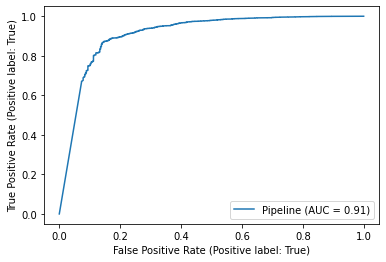

In [11]:
print_classification_summary(pipeline_characters, X_train, y_train)

Un umbral adecuado parece 1-0.2 = 0.8 que es donde parece maximizarse la True positive rate con el False positive rate minimo.

              precision    recall  f1-score   support

       False       0.21      0.85      0.34       383
        True       0.99      0.87      0.93      9617

    accuracy                           0.87     10000
   macro avg       0.60      0.86      0.63     10000
weighted avg       0.96      0.87      0.91     10000

      0     1
0   327    56
1  1236  8381


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


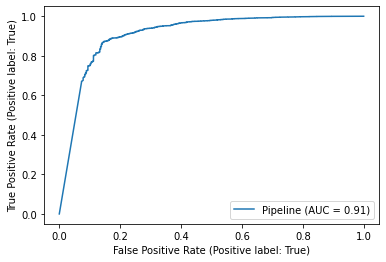

In [12]:
print_classification_summary(pipeline_characters, X_train, y_train, .8)

              precision    recall  f1-score   support

       False       0.13      0.82      0.23       264
        True       0.99      0.86      0.92      9736

    accuracy                           0.86     10000
   macro avg       0.56      0.84      0.58     10000
weighted avg       0.97      0.86      0.90     10000

      0     1
0   216    48
1  1393  8343


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


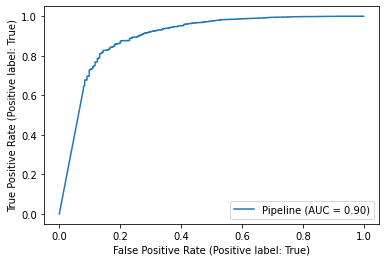

In [13]:
print_classification_summary(pipeline_characters, X_test, y_test, .8)

Se obtiene un AUC = 0.9. Un modelo de bastante calidad en cuanto a trade-off entre TPR y FPR

### Modelo basado en tokens (palabras)

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando únicamente características basadas en los tokens del texto. Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

In [14]:
pipeline_words = Pipeline([
    ('Transformer', ColumnTransformer(
                        [("text_preprocess_positive", CountVectorizer(analyzer='word', ngram_range=(1, 1), binary=True), "Positive_Review"),
                        ("text_preprocess_negative", CountVectorizer(analyzer='word', ngram_range=(1, 1), binary=True), "Negative_Review")])),
    ('Classifier', MultinomialNB())])

pipeline_words.fit(X_train, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('text_preprocess_positive',
                                                  CountVectorizer(binary=True),
                                                  'Positive_Review'),
                                                 ('text_preprocess_negative',
                                                  CountVectorizer(binary=True),
                                                  'Negative_Review')])),
                ('Classifier', MultinomialNB())])

Se escoge transformacion 1-gramas de palabras para considerar solo palabras.

              precision    recall  f1-score   support

       False       0.52      0.75      0.61       383
        True       0.99      0.97      0.98      9617

    accuracy                           0.96     10000
   macro avg       0.75      0.86      0.80     10000
weighted avg       0.97      0.96      0.97     10000

     0     1
0  288    95
1  269  9348


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


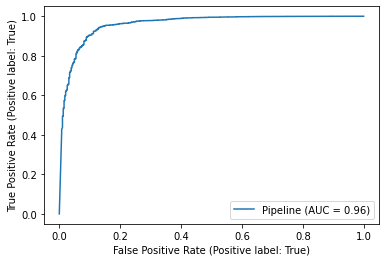

In [15]:
print_classification_summary(pipeline_words, X_train, y_train)

              precision    recall  f1-score   support

       False       0.45      0.80      0.58       383
        True       0.99      0.96      0.98      9617

    accuracy                           0.95     10000
   macro avg       0.72      0.88      0.78     10000
weighted avg       0.97      0.95      0.96     10000

     0     1
0  308    75
1  376  9241


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


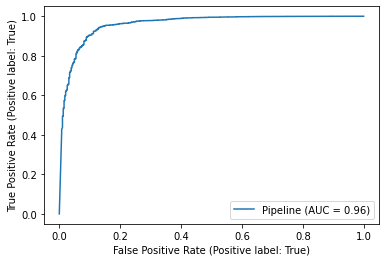

In [16]:
print_classification_summary(pipeline_words, X_train, y_train, .8)

Un umbral adecuado parece 1-0.2 = 0.8 que es donde parece maximizarse la True positive rate con el False positive rate minimo.

              precision    recall  f1-score   support

       False       0.29      0.68      0.41       264
        True       0.99      0.96      0.97      9736

    accuracy                           0.95     10000
   macro avg       0.64      0.82      0.69     10000
weighted avg       0.97      0.95      0.96     10000

     0     1
0  179    85
1  431  9305


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


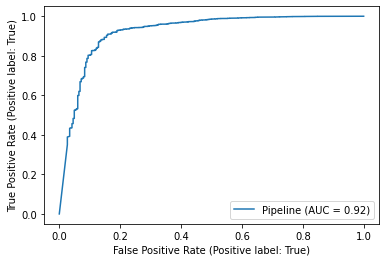

In [17]:
print_classification_summary(pipeline_words, X_test, y_test, .8)


Se ve una ligera mejora respecto al metodo basado en caractrers pero no es significativa.

### Modelo basado en análisis morfosintáctico

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando algún tipo de análisis morfosintáctico (como n-gramas de lemas, o filtros por POS o stopwords). Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

<table>
<tr><td width="80"><img src="img/exclamation.png" style="width:auto;height:auto"></td><td style="text-align:left">Recuerda que es posible acelerar el análisis morfosintáctico desactivando ciertas componentes del modelo nlp de spaCy. Revisa el notebook del ejercicio correspondiente para recordar cómo.</td></tr>
</table>

In [18]:
import spacy

# !python -m spacy download en

In [19]:
nlpfast = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

/usr/local/lib/python3.7/dist-packages/spacy/language.py:1899: UserWarning: [W123] Argument disable with value ['ner', 'parser'] is used instead of ['senter'] as specified in the config. Be aware that this might affect other components in your pipeline.
  config_value=config["nlp"][key],


Para el análisis morfosintáctico se hace la siguiente transformación:

1. Se filtran las palabras por categoría morfológica con más carga de emoción: sustantivos, verbos y adjetivos.

2. Se filtran las stopwords ya que no aportan información

3. Se sustituye cada token por su lema para reducir el tamaño del vocabulario y tener un problema más sencillo.

In [20]:
def filter_relevant_tokens(review: spacy.tokens.doc.Doc, relevant_tokens = ['NOUN', 'VERB', 'ADJ']):

  target_tokens = []

  for ind, token in enumerate(nlpfast(review)):
    if token.pos_ in relevant_tokens and ~token.is_stop: # se seleccionan los tokens relevantes del argumento y que no sean stop
      target_tokens.append(token.lemma_)
    else: continue
  return ' '.join(target_tokens)

In [21]:
X_train_morfo, X_test_morfo = X_train.copy(), X_test.copy()

In [22]:
for review_column in ['Positive_Review', 'Negative_Review']:

  X_train_morfo[review_column] = X_train[review_column].apply(lambda x: filter_relevant_tokens(nlpfast(x)).strip())
  X_test_morfo[review_column] = X_test[review_column].apply(lambda x: filter_relevant_tokens(nlpfast(x)).strip())

In [23]:
pipeline_words.fit(X_train_morfo, y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('text_preprocess_positive',
                                                  CountVectorizer(binary=True),
                                                  'Positive_Review'),
                                                 ('text_preprocess_negative',
                                                  CountVectorizer(binary=True),
                                                  'Negative_Review')])),
                ('Classifier', MultinomialNB())])

              precision    recall  f1-score   support

       False       0.61      0.71      0.66       383
        True       0.99      0.98      0.99      9617

    accuracy                           0.97     10000
   macro avg       0.80      0.85      0.82     10000
weighted avg       0.97      0.97      0.97     10000

     0     1
0  273   110
1  175  9442


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


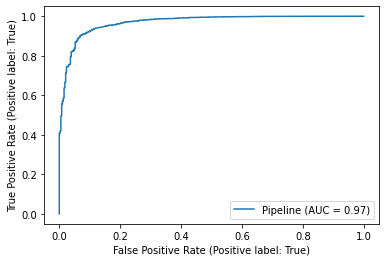

In [24]:
print_classification_summary(pipeline_words, X_train_morfo, y_train)

              precision    recall  f1-score   support

       False       0.53      0.76      0.63       383
        True       0.99      0.97      0.98      9617

    accuracy                           0.97     10000
   macro avg       0.76      0.87      0.80     10000
weighted avg       0.97      0.97      0.97     10000

     0     1
0  292    91
1  256  9361


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


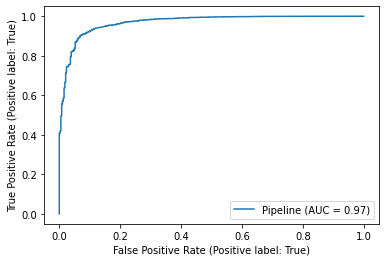

In [25]:
print_classification_summary(pipeline_words, X_train_morfo, y_train, th=.8)

Un umbral adecuado parece 1-0.3 = 0.7 que es donde parece maximizarse la True positive rate con el False positive rate minimo.

              precision    recall  f1-score   support

       False       0.38      0.57      0.46       264
        True       0.99      0.97      0.98      9736

    accuracy                           0.96     10000
   macro avg       0.68      0.77      0.72     10000
weighted avg       0.97      0.96      0.97     10000

     0     1
0  151   113
1  245  9491


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


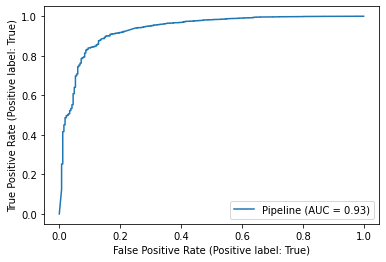

In [26]:
print_classification_summary(pipeline_words, X_test_morfo, y_test, th=.7)

Se produce un aligera mejora respecto a los modelos anteriores

### Modelo basado en Deep Learning

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Construye un modelo de clasificación que en base a la crítica en texto de un hotel determine si esta es favorable o desfavorable, empleando una aproximación basada en Embeddings y algún tipo de modelo de mezcla (CNN, LSTM, GRU, ...). Mide el nivel de acierto sobre el conjunto de test. ¿Qué nivel de precisión puedes alcanzar?</td></tr>
</table>

Se transforme el conjunto de train en un único vector para aplicar un tokenizer. Se usa el tratamiento de seleccion morfosintactico por demostrarse superior a los textos raw en las primeras secciones. 

In [27]:
X_train_uniquecol = X_train_morfo['Positive_Review'] + " " + X_train_morfo['Negative_Review']
X_test_uniquecol = X_test_morfo['Positive_Review'] + " " + X_test_morfo['Negative_Review']

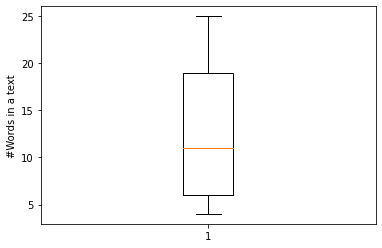

In [28]:

maxwords = 15000
tokenizer = Tokenizer(num_words = maxwords)

tokenizer.fit_on_texts(X_train_uniquecol)

X_train_tokenized = tokenizer.texts_to_sequences(X_train_uniquecol)
X_test_tokenized = tokenizer.texts_to_sequences(X_test_uniquecol)

plt.boxplot([len(text) for text in X_train_tokenized], whis=[15, 85], showfliers=False)
plt.ylabel("#Words in a text")
plt.show()

Se ve que el número medio de palabras es 15. Se escoge 30 para hacer un padding en los vectores y simplificar el problema.

In [29]:

maxsequence = 15
X_train_tokenized = pad_sequences(X_train_tokenized, maxlen=maxsequence)
X_test_tokenized = pad_sequences(X_test_tokenized, maxlen=maxsequence)

In [30]:
X_train_tokenized.shape

(10000, 15)

Se define la metrica a optimizar, en este caso debido al desbalaceo se optimizará el AUC (Area Under Curve) de la curva ROC.

In [31]:
from keras.layers import LSTM
from keras.layers import GRU
from tensorflow.keras.metrics import AUC

auc = AUC(
    num_thresholds=200,
    curve="ROC",
    summation_method="interpolation",
    name=None,
    dtype=None,
    thresholds=None,
    multi_label=False,
    num_labels=None,
    label_weights=None,
    from_logits=False,
)

Se define el modelo DL:

1. Un embedding al inicio para transformar los indices de palabras en una representacion vectorial que pueda tratar la red neuronal.

2. Gated Recurrent Unit layer (GRU) para implementar una red LSTM ligera.

3. Una capa oculta previa a la salida con activación sigmoidal

In [32]:
model = Sequential()
model.add(Embedding(input_dim=maxwords, input_length=maxsequence, output_dim=64))
model.add(GRU(32)) #GRU(32) | GlobalAveragePooling1D() | LSTM(32)
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[auc])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 64)            960000    
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 969,441
Trainable params: 969,441
Non-trainable params: 0
_________________________________________________________________


Se entrena la red con batches de 32 y 10 epocas (un numero relativamente pequeño para hacer pruebas)

In [33]:
model.fit(X_train_tokenized, y_train, batch_size=32, epochs=10)

Epoch 1/10
313/313 [==============================] - 9s 19ms/step - loss: 0.1760 - auc: 0.7543
Epoch 2/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0765 - auc: 0.9558
Epoch 3/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0509 - auc: 0.9731
Epoch 4/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0363 - auc: 0.9826
Epoch 5/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0277 - auc: 0.9864
Epoch 6/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0230 - auc: 0.9901
Epoch 7/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0203 - auc: 0.9911
Epoch 8/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0178 - auc: 0.9942
Epoch 9/10
313/313 [==============================] - 6s 18ms/step - loss: 0.0149 - auc: 0.9961
Epoch 10/10
313/313 [==============================] - 6s 19ms/step - loss: 0.0154 - auc: 0.9935


In [34]:
th = .8
y_th = (model.predict(X_test_tokenized) >= th).astype(bool)
print(pd.DataFrame(confusion_matrix(y_test, y_th)))
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_th)

313/313 [==============================] - 1s 3ms/step
     0     1
0   68   196
1  169  9567


0.6201087497821269

Se observa un resultado decente AUC en test (0.7) pero con respecto a train (0.97) es pequeño, asique hay indicios de overfitting. Con un fine tunning adecuado debería dar resultados mejores que el approach clásico, no se ha seguido adelante por falta de tiempo.

## Otras aproximaciones

<table>
<tr><td width="80"><img src="img/pro.png" style="width:auto;height:auto"></td><td style="text-align:left">Intenta mezclar varias de las features de puntos anteriores en un único modelo, o probar otras aproximaciones. ¿Puedes conseguir un acierto aún mejor?</td></tr>
</table>

In [35]:
####### INSERT YOUR CODE HERE

## Informe

<table>
<tr><td width="80"><img src="img/question.png" style="width:auto;height:auto"></td><td style="text-align:left">Escribe un informe explicando qué decisiones has tomado a la hora de diseñar el modelo, qué cosas has probado, qué ha funcionado y qué no. Además, realiza una tabla comparativa con los scores sobre el conjunto de test de todos los modelos realizados en la práctica indicando con cuál se ha conseguido mejores resultados.</td></tr>
</table>

CONCLUSIONES:

1. Se ha visto como implementar end-to-end un modelo de NLP para distinguir criticas positivas y negativas. Se obsrvan buenos resultados con técnicas clásicas: Count vectorizer + Naive Bayes con n-gramas de caracteres o palabras. 

2. Se observa que una limpieza de stopwords y seleccion de categorias morfologicas mejora significativamente los resultados respecto al texto raw.

3. En el caso de Deep Learning se ha visto que la etapa de fine tunning es muy relevante para dar buenos resultados. NO se ha llegado a conclusiones claras en este punto por falta de tiempo para investigar que hiperparametros son los adecuados para el problema. 